<a href="https://colab.research.google.com/github/IgorQuaresma/-bootcamp_alura_projetos/blob/main/bootcamp_alura_projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Projeto de Análise do histórico de casos de tuberculose nas Unidades Federativas.

Casos notificados de tuberculose (2001 até 2020)

*Dados retirados da base de dados do datasus



O que é Tuberculose? 

A tuberculose é uma doença infecto contagiosa transmitida pela bactéria Mycobacterium tuberculosis, o bacilo de Koch, e tem como principais sintomas tosse por mais de duas semanas, produção de catarro, febre, sudorese, cansaço e dor no peito. 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

In [2]:
#Criar variável de acesso aos dados (repositório do github)
url = 'https://raw.githubusercontent.com/IgorQuaresma/-bootcamp_alura_projetos/main/Dados/A005906189_28_143_208.csv'

In [3]:
#Lendo os dados
dados = pd.read_csv(url, encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter=19,
                    thousands=".", decimal=",")


dados = dados[dados.columns[0:-1]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [4]:
dados =dados.rename(columns={'UF de residência':'UF_res'})

In [5]:
#Primeira visão geral de estatísticas básicas do dataset  
dados.describe()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.00000
mean,3116.607143,3316.392857,3349.035714,3320.678571,3287.678571,3036.821429,3021.428571,3098.857143,3082.785714,3049.321429,3136.178571,3077.964286,3078.857143,3043.321429,3051.857143,3078.821429,3260.750000,3412.107143,3486.750000,2988.50000
std,4597.990345,4586.776641,4459.765037,4330.591560,4245.612961,4178.295941,4111.943070,4263.911556,4174.130873,4195.821273,4319.729905,4222.261229,4253.299275,4314.703364,4393.309254,4426.988610,4706.950469,4800.181650,4804.473337,4168.66708
min,144.000000,172.000000,198.000000,215.000000,147.000000,31.000000,51.000000,68.000000,64.000000,70.000000,70.000000,69.000000,62.000000,1.000000,55.000000,62.000000,65.000000,59.000000,69.000000,41.00000
25%,671.500000,772.750000,828.500000,924.750000,905.750000,649.250000,572.750000,656.750000,678.000000,607.000000,674.500000,671.500000,700.500000,736.000000,691.250000,762.500000,768.500000,799.750000,809.500000,685.25000
50%,1376.500000,1372.500000,1442.000000,1461.000000,1459.000000,1341.500000,1283.000000,1367.500000,1371.500000,1369.500000,1386.000000,1438.000000,1402.000000,1309.000000,1319.500000,1239.000000,1358.500000,1515.000000,1488.500000,1385.00000
75%,3303.000000,4009.500000,4175.000000,4227.750000,4194.500000,3908.500000,3908.250000,4000.750000,4271.750000,4199.750000,4378.000000,4128.000000,4083.000000,3904.000000,4016.750000,4050.750000,4108.500000,4292.500000,4392.000000,3739.50000
max,19139.000000,19046.000000,18389.000000,17601.000000,17539.000000,18054.000000,17618.000000,18430.000000,17807.000000,18178.000000,19045.000000,18641.000000,19481.000000,19995.000000,20334.000000,20536.000000,22064.000000,22214.000000,21899.000000,19015.00000


In [6]:
###A

###A região do país desempenha um grande fator na incidência de casos?

In [121]:
#Definir as UFs como indices
estados  = dados.set_index('UF_res')
estados.head()


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
UF_res,,,,,,,,,,,,,,,,,,,,
11 Rondônia,672,637,648,627,630,521,551,566,681,571,680,692,699,679,653,763,773,676,739,575
12 Acre,357,364,367,353,319,389,305,298,352,340,389,392,391,440,348,443,485,483,585,539
13 Amazonas,2330,2279,2369,2557,2485,2429,2454,2691,2617,2753,2685,2842,3066,3173,3420,3271,3683,3789,3944,3493
14 Roraima,144,172,198,215,147,138,132,148,139,139,164,131,166,143,172,158,209,266,325,289
15 Pará,3600,3882,4038,4146,4040,3831,3821,3842,4140,4161,4370,4093,4167,3985,4031,4254,4546,4721,5565,4461


In [122]:
#Criar coluna com as regioes de cada regiao

dicionario_regioes = {'1':'Norte', '2':'Nordeste', '3':'Sudeste', '4':'Sul', '5':'Centro-Oeste'}

estados['Regiao'] = estados.index.map(lambda x : x.split()[0][0])
estados['Regiao'] = estados['Regiao'].map(dicionario_regioes)
estados.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Regiao
UF_res,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,672,637,648,627,630,521,551,566,681,571,680,692,699,679,653,763,773,676,739,575,Norte
12 Acre,357,364,367,353,319,389,305,298,352,340,389,392,391,440,348,443,485,483,585,539,Norte
13 Amazonas,2330,2279,2369,2557,2485,2429,2454,2691,2617,2753,2685,2842,3066,3173,3420,3271,3683,3789,3944,3493,Norte
14 Roraima,144,172,198,215,147,138,132,148,139,139,164,131,166,143,172,158,209,266,325,289,Norte
15 Pará,3600,3882,4038,4146,4040,3831,3821,3842,4140,4161,4370,4093,4167,3985,4031,4254,4546,4721,5565,4461,Norte


Ver como funciona o comportamento da ocorrência de casos em cada uma das regiões brasileiras.

In [15]:
agrupado_regioes = estados.groupby('Regiao').sum()
agrupado_regioes

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Regiao,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,4039,3777,3991,3738,3953,3628,3604,3674,3585,3699,3833,4226,4475,4235,3983,4048,4133,4542,4579,3681
Nordeste,25672,26242,27536,27655,27875,24777,24173,24493,24885,23878,24413,23755,23088,22402,22215,22556,24242,25732,25743,21790
Norte,7634,7931,8165,8440,8150,7814,7767,8020,8415,8389,8765,8600,8904,8811,9029,9374,10174,10444,11759,9831
Sudeste,39113,43298,42072,41067,40244,38985,38591,39829,38475,38339,39441,38375,38416,38602,39145,39494,41367,42724,42698,37693
Sul,10137,10793,11121,11033,10901,9796,10414,10684,10894,11006,11291,11158,11263,11162,11025,10673,11320,12038,12781,10642


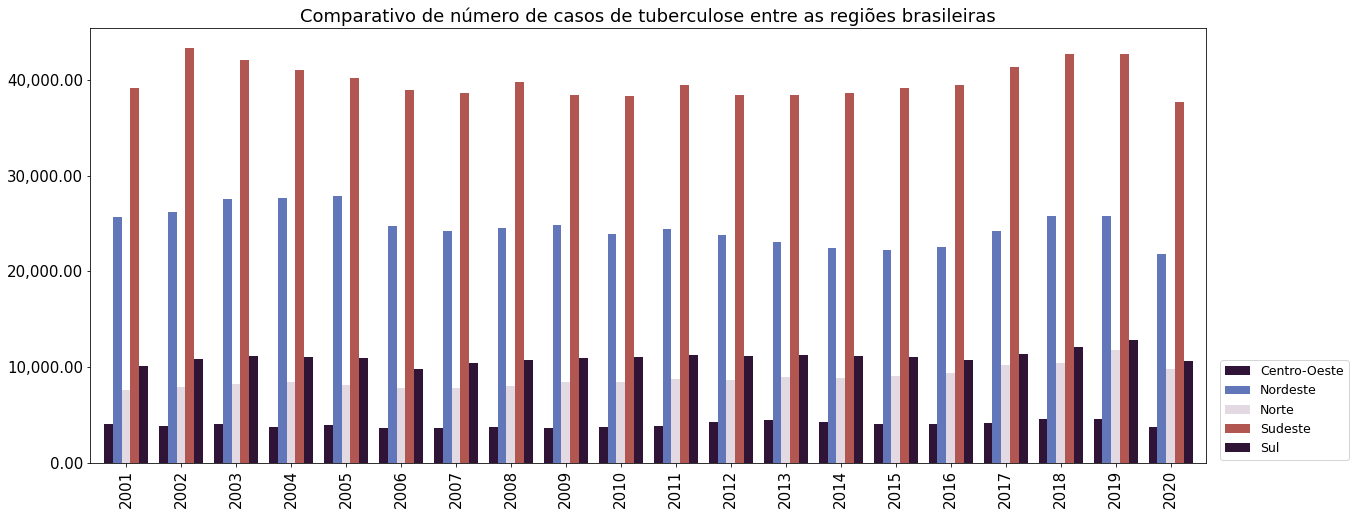

In [90]:
ax = agrupado_regioes.T.plot(kind='bar', figsize=(20,8), width=0.8, cmap=plt.get_cmap('twilight_shifted'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.legend(loc="upper center", fontsize="small", bbox_to_anchor=((0.82, -0.25,0.5, 0.5)), title_fontsize=30)
plt.rcParams.update({'font.size': 15})
plt.title('Comparativo de número de casos de tuberculose entre as regiões brasileiras')
plt.show()


Percebe-se que a região sudeste sempre apresentou a maior quantidade de casos de tuberculose. Em seguida, tem-se a região Nordeste, a região Sul, a região Norte e por fim, a região Centro-Oeste. 

A região sudeste concentra o maior número de residentes no Brasil, portanto, espera-se que com mais pessoas a quantidade de casos possa ser maior. Para aprofundar a análise, deve-se realizar a mesma análise, porém, considerando a normalização pela população de cada uma das regiões.



In [143]:
populacao = pd.read_csv('https://raw.githubusercontent.com/IgorQuaresma/-bootcamp_alura_projetos/main/Dados/estimativa_pop_2020.csv', header=1, skipfooter=7)
populacao = populacao.drop(['Unnamed: 1','Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
populacao = populacao.set_index('BRASIL E UNIDADES DA FEDERAÇÃO')
populacao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,POPULAÇÃO ESTIMADA
BRASIL E UNIDADES DA FEDERAÇÃO,
Brasil,"211,755,692"
Região Norte,"18,672,591"
Rondônia,"1,796,460"
Acre,"894,470"
Amazonas,"4,207,714"
Roraima,"631,181"
Pará,"8,690,745"
Amapá,"861,773"
Tocantins,"1,590,248"


In [176]:
#Selecionando apenas as celulas das regioes 
populacao_regiao = populacao[populacao.index.str.contains("Região")]
pd.options.display.float_format = '{:. .2f}'.format
populacao_regiao['POPULAÇÃO ESTIMADA'] = populacao_regiao['POPULAÇÃO ESTIMADA'].map(lambda x : x.replace(',','')).astype('int')
populacao_regiao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
